In [23]:
import pandas
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np
import math
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.arima_model import ARIMA

In [24]:
df = pandas.read_csv('n26_v1.csv')
df.head()

,Unnamed: 0,userid,cpc,organic,affiliate,social,signup_date,campaign
0,0,e0912256-b48a-45c0-afec-23350d341abd,1,0,0,1,2017-02-01,0
1,1,321c18f1-c58e-488d-a60a-462dfc9d38aa,1,0,1,0,2017-01-10,0
2,2,3d03c163-d14b-49da-873a-a54cc3b400e3,0,0,1,1,2017-03-24,0
3,3,3acb5a84-4375-405b-9a8b-bfb8979ab9bc,1,0,0,0,2017-03-06,0
4,4,1b488764-6874-4483-8e70-815feb07b154,1,0,0,0,2017-03-03,0


In [25]:
df1=df.groupby('signup_date').count()

In [26]:
df2=df1['campaign']

In [27]:
df2.to_frame()

,campaign
signup_date,
2017-01-01,67
2017-01-02,56
2017-01-03,47
2017-01-04,54
2017-01-05,50
2017-01-06,57
2017-01-07,54
2017-01-08,60
2017-01-09,59


In [29]:
df2.to_csv("sign_ups.csv")

In [7]:
df3=df2.reset_index(drop=True)

In [10]:
df3.head()

0    67
1    56
2    47
3    54
4    50
Name: campaign, dtype: int64

In [11]:
price=df3

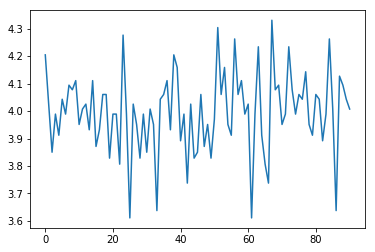

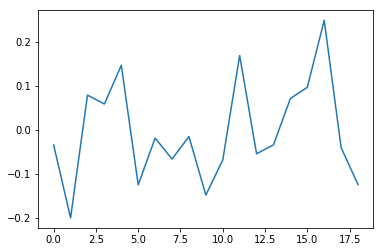

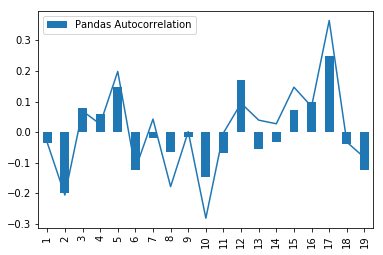

(-8.262815121987488,
 5.029867638155573e-13,
 1,
 89,
 {'1%': -3.506057133647011,
  '10%': -2.5844100201994697,
  '5%': -2.8946066061911946},
 -89.16014597489155)

In [12]:
lnprice=np.log(price)
lnprice
plt.plot(lnprice)
plt.show()
acf_1 =  acf(lnprice)[1:20]
plt.plot(acf_1)
plt.show()
test_df = pandas.DataFrame([acf_1]).T
test_df.columns = ['Pandas Autocorrelation']
test_df.index += 1
test_df.plot(kind='bar')
pacf_1 =  pacf(lnprice)[1:20]
plt.plot(pacf_1)
plt.show()
test_df = pandas.DataFrame([pacf_1]).T
test_df.columns = ['Pandas Partial Autocorrelation']
test_df.index += 1
test_df.plot(kind='bar')
result = ts.adfuller(lnprice, 1)
result

/Users/juanrodriguezceferino/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1127: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


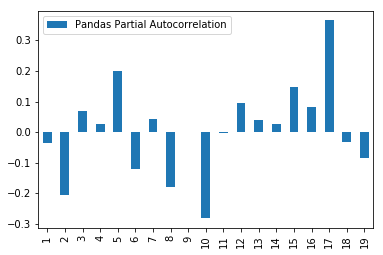

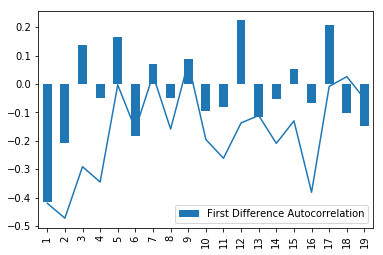

In [13]:
lnprice_diff=lnprice-lnprice.shift()
diff=lnprice_diff.dropna()
acf_1_diff =  acf(diff)[1:20]
test_df = pandas.DataFrame([acf_1_diff]).T
test_df.columns = ['First Difference Autocorrelation']
test_df.index += 1
test_df.plot(kind='bar')
pacf_1_diff =  pacf(diff)[1:20]
plt.plot(pacf_1_diff)
plt.show()

In [20]:
price_matrix=lnprice.as_matrix()
model = ARIMA(price_matrix, order=(0,1,0))
model_fit = model.fit(disp=0)

In [21]:
predictions=model_fit.predict(92, 180 , typ='levels')
predictions
predictionsadjusted=np.exp(predictions)
predictionsadjusted

array([54.8795235 , 54.7593109 , 54.63936162, 54.51967509, 54.40025073,
       54.28108797, 54.16218623, 54.04354494, 53.92516354, 53.80704145,
       53.6891781 , 53.57157293, 53.45422537, 53.33713486, 53.22030083,
       53.10372273, 52.98739999, 52.87133205, 52.75551836, 52.63995835,
       52.52465148, 52.40959718, 52.29479491, 52.18024411, 52.06594423,
       51.95189473, 51.83809504, 51.72454464, 51.61124296, 51.49818947,
       51.38538362, 51.27282487, 51.16051268, 51.0484465 , 50.93662581,
       50.82505005, 50.7137187 , 50.60263122, 50.49178708, 50.38118573,
       50.27082666, 50.16070933, 50.0508332 , 49.94119776, 49.83180247,
       49.72264681, 49.61373026, 49.50505228, 49.39661236, 49.28840998,
       49.18044461, 49.07271574, 48.96522285, 48.85796542, 48.75094293,
       48.64415487, 48.53760073, 48.43128   , 48.32519216, 48.2193367 ,
       48.11371312, 48.00832091, 47.90315955, 47.79822855, 47.6935274 ,
       47.58905559, 47.48481263, 47.38079801, 47.27701123, 47.17

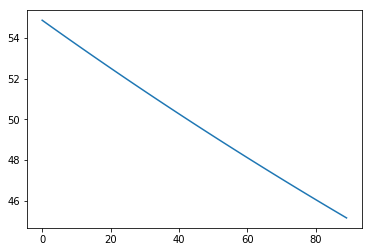

In [22]:
plt.plot(predictionsadjusted)
plt.show()